In [ ]:
# uniquement pour utliser dans colab : 

# !git clone https://github.com/CarinePivoteau/Alea2023Notebooks.git
# import sys
# sys.path.append('/content/Alea2023Notebooks')

In [ ]:
# si les modules ne sont pas installés :

# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install graphviz

In [1]:
# imports : random, time, math, sys, plt, graphviz

from helpers import *
from gen_laws import *

In [2]:
# T = Z x Set(T) => T = Z x F, tF = tT x F

cayley_max = 700 # on calcule les coefficients re-normalisés... au delà, on a des flottants trop petit
cayley_trees=[0]
cayley_forests=[1]

for i in range(1,cayley_max+1):
    cayley_trees.append(cayley_forests[i-1])
    cayley_forests.append(sum(cayley_forests[i-k] * k * cayley_trees[k]/i for k in range(1,i+1)))

print(cayley_trees[:6])
print(cayley_forests[:6])

[0, 1, 1.0, 1.5, 2.6666666666666665, 5.208333333333333]
[1, 1.0, 1.5, 2.6666666666666665, 5.208333333333333, 10.8]


In [3]:
print(cayley_forests[700])

5.925339312051314e+299


In [4]:
# T = Z x Set(T) => T = Z x F, tF = tT x F

def gen_cayley_tree(n):
    if n == 1:
        return ['z'] # Z
    return ['z']+[t for t in gen_cayley_forest(n-1)]

def uniform_cut(n):
    u = random()
    k = 0
    s = 0
    while u > s:
        k += 1
        s += k * cayley_trees[k] * cayley_forests[n-k] / (n * cayley_forests[n])  # tF = tT x F
    return k

def gen_cayley_forest(n):
    if n == 0:
        return []
    k = uniform_cut(n)
    return [gen_cayley_tree(k)] + gen_cayley_forest(n-k)

def gen_cayley_tree_labelled(n):
    p = random_permutation(n)

    def aux(t):
        if t == ['z']:
            return [p.pop()]
        return [p.pop()] + sorted([aux(tt) for tt in t[1:]])  # tri pour imposer l'ordre d'affichage
    return aux(gen_cayley_tree(n))

In [6]:
print(gen_cayley_tree(20))

['z', ['z', ['z', ['z', ['z', ['z', ['z', ['z']]]], ['z']], ['z', ['z']], ['z']], ['z', ['z', ['z'], ['z']]]], ['z'], ['z', ['z'], ['z']]]


In [7]:
print(gen_cayley_tree_labelled(100))

[4, [37, [25, [64, [26, [40, [85], [99, [30]]]], [39, [60, [7]]], [59]]], [63]], [97, [21, [50, [13], [36, [49, [29, [43, [83, [6], [84, [61, [5, [67]], [10], [12, [33, [18, [24, [51]], [89]]]]]]]]], [53, [8]], [86, [96, [20]]], [95, [3, [17, [31], [58, [14, [80]]]], [72, [47, [52, [28], [87, [55, [11, [44, [92]]], [71]]]], [70]]]], [35], [88, [38], [74], [77]]]]], [90, [16, [56, [19], [22, [34], [45], [48, [94]], [76, [23, [27, [42], [79, [9], [15]]]]]], [69, [32], [93, [1, [46], [98, [41, [54, [66]], [81]]]]]]], [100, [62], [73], [78]]], [75, [65]]]]], [68, [91, [2], [82, [57]]]]]]


In [8]:
count_occurences(lambda : gen_cayley_tree_labelled(4),1000000)

nb: 64
[1, [2, [3]], [4]] 1.57
[2, [1, [3, [4]]]] 1.55
[4, [3, [1], [2]]] 1.59
[3, [2, [4, [1]]]] 1.55
[3, [1], [2], [4]] 1.57
[1, [3], [4, [2]]] 1.57
[3, [4, [1, [2]]]] 1.55
[3, [1], [4, [2]]] 1.56
[2, [3, [4, [1]]]] 1.56
[2, [1], [4, [3]]] 1.56
[1, [3, [2, [4]]]] 1.58
[4, [1, [2, [3]]]] 1.55
[1, [2], [3], [4]] 1.57
[3, [2, [1, [4]]]] 1.58
[2, [3, [1], [4]]] 1.56
[4, [2, [1], [3]]] 1.56
[1, [3, [4, [2]]]] 1.55
[4, [1, [2], [3]]] 1.57
[4, [1, [2]], [3]] 1.57
[2, [1, [3], [4]]] 1.55
[3, [2], [4, [1]]] 1.55
[1, [2], [3, [4]]] 1.56
[4, [2, [1, [3]]]] 1.56
[4, [2, [3, [1]]]] 1.57
[2, [4, [1], [3]]] 1.58
[3, [1, [4]], [2]] 1.56
[3, [2, [1]], [4]] 1.55
[2, [1, [4, [3]]]] 1.55
[2, [3], [4, [1]]] 1.56
[1, [4, [2], [3]]] 1.56
[1, [2, [4]], [3]] 1.57
[4, [1, [3]], [2]] 1.56
[3, [4, [2, [1]]]] 1.55
[1, [2], [4, [3]]] 1.57
[4, [2], [3, [1]]] 1.58
[4, [1], [2], [3]] 1.56
[2, [1], [3, [4]]] 1.57
[3, [1, [2], [4]]] 1.58
[1, [4, [3, [2]]]] 1.58
[3, [4, [1], [2]]] 1.55
[4, [1], [2, [3]]] 1.57
[2, [1, [

1 14 27 40 53 66 79 92 105 118 131 144 157 170 183 196 209 222 235 248 261 274 287 300 313 326 339 352 365 378 391 404 417 430 443 456 469 482 495 508 521 534 547 560 573 586 599 612 625 638 651 664 677 690 

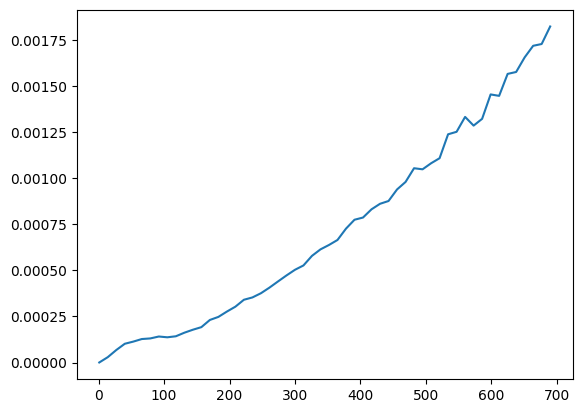

In [12]:
plot_time(gen_cayley_tree, 700, nb_steps = 50, nb = 100)

In [13]:
def profiles(nb, size): # nombre de noeuds moyen à chaque hauteur
    heights = [0]
    def p(t,h):
        if h == len(heights):
            heights.append(1)
        else:
            heights[h]+=1
        if t!=():
            for st in t[1:]:
                p(st,h+1)
    for _ in range(nb):
        t = gen_cayley_tree(size)
        p(t,0)
    return [heights[i]/nb for i in range(len(heights))]

113


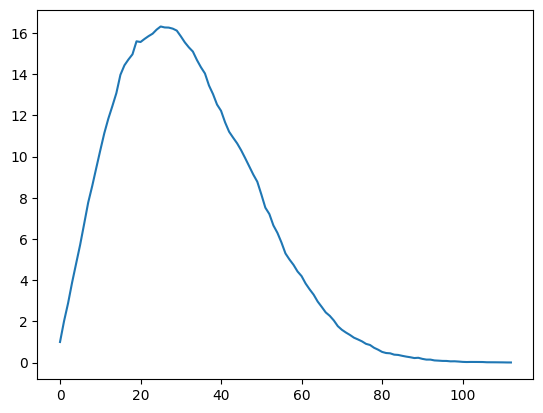

In [14]:
ps = profiles(1000,700)
print(len(ps))
plt.plot(ps)
plt.show()